# Natural Language Processing

In [65]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 300.0/300.0 kB 6.2 MB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [66]:
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable


In [99]:
!pip install --upgrade nltk

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 1.5/1.5 MB 10.7 MB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from scipy import stats

#nlp

# preprocessing import



import nltk
nltk.download('stopwords')
import re
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer
from nltk import WordNetLemmatizer
from nltk.corpus import stopwords
import string
string.punctuation

# bow,tfidf,word2vec

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from gensim.models import word2vec

from wordcloud import WordCloud, ImageColorGenerator,STOPWORDS



#model building

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import *
from sklearn.model_selection import *
from sklearn.metrics import *
from sklearn.feature_extraction.text import *

from sklearn.linear_model import *
from sklearn.ensemble import *
from sklearn.svm import SVC

from sklearn.naive_bayes import *

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jnirm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
df_train = pd.read_csv("SMS_train.csv",encoding='cp1252',index_col=0)
df_train.head()

,Message_body,Label
S. No.,,
1,Rofl. Its true to its name,Non-Spam
2,The guy did some bitching but I acted like i'd...,Non-Spam
3,"Pity, * was in mood for that. So...any other s...",Non-Spam
4,Will ü b going to esplanade fr home?,Non-Spam
5,This is the 2nd time we have tried 2 contact u...,Spam


In [26]:
df_test = pd.read_csv("SMS_test.csv",encoding="cp1252",index_col=0)
df_test.head()

,Message_body,Label
S. No.,,
1,"UpgrdCentre Orange customer, you may now claim...",Spam
2,"Loan for any purpose £500 - £75,000. Homeowner...",Spam
3,Congrats! Nokia 3650 video camera phone is you...,Spam
4,URGENT! Your Mobile number has been awarded wi...,Spam
5,Someone has contacted our dating service and e...,Spam


In [27]:
print("df_train",df_train.shape)
print("df_test",df_test.shape)

df_train (957, 2)
df_test (125, 2)


In [28]:
df_train


,Message_body,Label
S. No.,,
1,Rofl. Its true to its name,Non-Spam
2,The guy did some bitching but I acted like i'd...,Non-Spam
3,"Pity, * was in mood for that. So...any other s...",Non-Spam
4,Will ü b going to esplanade fr home?,Non-Spam
5,This is the 2nd time we have tried 2 contact u...,Spam
...,...,...
953,hows my favourite person today? r u workin har...,Non-Spam
954,How much you got for cleaning,Non-Spam
955,Sorry da. I gone mad so many pending works wha...,Non-Spam


In [29]:
df_train["Message_body"] = [i.lower() for i in df_train["Message_body"]]

In [30]:
df_train

,Message_body,Label
S. No.,,
1,rofl. its true to its name,Non-Spam
2,the guy did some bitching but i acted like i'd...,Non-Spam
3,"pity, * was in mood for that. so...any other s...",Non-Spam
4,will ü b going to esplanade fr home?,Non-Spam
5,this is the 2nd time we have tried 2 contact u...,Spam
...,...,...
953,hows my favourite person today? r u workin har...,Non-Spam
954,how much you got for cleaning,Non-Spam
955,sorry da. i gone mad so many pending works wha...,Non-Spam


In [31]:
df_train["Message_body"] = [ i for i in df_train["Message_body"]  if i not in string.punctuation]

In [32]:
# for i in string.punctuation:
#     print(i)

In [33]:
df_train["Message_body"]=df_train["Message_body"].str.replace('[$,?,@,#,"",&]'," ")

In [34]:
df_train["Message_body"] = df_train["Message_body"].str.replace("\s+"," ")

In [35]:
df_train["Message_body"]=df_train["Message_body"].str.replace("\d+","")

In [36]:
df_train["Message_body"]= df_train["Message_body"].str.replace("w{3}","")

In [37]:
df_train["Message_body"]=df_train["Message_body"].str.replace("http\s+","")

In [38]:
df_train["Message_body"]=df_train["Message_body"].str.replace("\s+[a-zA-Z]\s+","")

In [60]:
def tokenize(x):
    tokenizer = RegexpTokenizer(r'\w+')
    return tokenizer.tokenize(x)
                                
def stemmer(x):
    stemmer = PorterStemmer()
    return ' '.join([stemmer.stem(word) for word in x])
 
def lemmatize(x):
    lemmatizer = WordNetLemmatizer()
    return ' '.join([lemmatizer.lemmatize(word,pos='v') for word in x])

In [40]:
df_train['tokens'] = df_train['Message_body'].map(tokenize)

In [50]:
df_train['stems'] = df_train['tokens'].map(stemmer)

In [70]:
df_train['lemma'] = df_train['tokens'].map(lemmatize)

In [72]:
df_train

,Message_body,Label,tokens,stems,lemma
S. No.,,,,,
1,rofl. its true to its name,Non-Spam,"[rofl, its, true, to, its, name]",rofl it true to it name,rofl its true to its name
2,the guy did some bitching butacted like i'd be...,Non-Spam,"[the, guy, did, some, bitching, butacted, like...",the guy did some bitch butact like i d be inte...,the guy do some bitch butacted like i d be int...
3,pity * was in mood for that. so...any other su...,Non-Spam,"[pity, was, in, mood, for, that, so, any, othe...",piti wa in mood for that so ani other suggest,pity be in mood for that so any other suggestions
4,will ügoing to esplanade fr home,Non-Spam,"[will, ügoing, to, esplanade, fr, home]",will ügo to esplanad fr home,will ügoing to esplanade fr home
5,this is the nd time we have tried contact u.h...,Spam,"[this, is, the, nd, time, we, have, tried, con...",thi is the nd time we have tri contact u have ...,this be the nd time we have try contact u have...
...,...,...,...,...,...
953,hows my favourite person todayu workin hard co...,Non-Spam,"[hows, my, favourite, person, todayu, workin, ...",how my favourit person todayu workin hard coul...,hows my favourite person todayu workin hard co...
954,how much you got for cleaning,Non-Spam,"[how, much, you, got, for, cleaning]",how much you got for clean,how much you get for clean
955,sorry da.gone mad so many pending works what t...,Non-Spam,"[sorry, da, gone, mad, so, many, pending, work...",sorri da gone mad so mani pend work what to do,sorry da go mad so many pending work what to do


In [73]:
df_test["tokens"] = df_test["Message_body"].map(tokenize)

In [74]:
df_test["stem"] = df_test["tokens"].map(stemmer)

In [76]:
df_test["lemma"] = df_test["tokens"].map(lemmatize)

In [77]:
df_test

,Message_body,Label,tokens,stem,lemma
S. No.,,,,,
1,"UpgrdCentre Orange customer, you may now claim...",Spam,"[UpgrdCentre, Orange, customer, you, may, now,...",upgrdcentr orang custom you may now claim your...,UpgrdCentre Orange customer you may now claim ...
2,"Loan for any purpose £500 - £75,000. Homeowner...",Spam,"[Loan, for, any, purpose, 500, 75, 000, Homeow...",loan for ani purpos 500 75 000 homeown tenant ...,Loan for any purpose 500 75 000 Homeowners Ten...
3,Congrats! Nokia 3650 video camera phone is you...,Spam,"[Congrats, Nokia, 3650, video, camera, phone, ...",congrat nokia 3650 video camera phone is your ...,Congrats Nokia 3650 video camera phone be your...
4,URGENT! Your Mobile number has been awarded wi...,Spam,"[URGENT, Your, Mobile, number, has, been, awar...",urgent your mobil number ha been award with a ...,URGENT Your Mobile number have be award with a...
5,Someone has contacted our dating service and e...,Spam,"[Someone, has, contacted, our, dating, service...",someon ha contact our date servic and enter yo...,Someone have contact our date service and ente...
...,...,...,...,...,...
121,7 wonders in My WORLD 7th You 6th Ur style 5th...,Non-Spam,"[7, wonders, in, My, WORLD, 7th, You, 6th, Ur,...",7 wonder in my world 7th you 6th ur style 5th ...,7 wonder in My WORLD 7th You 6th Ur style 5th ...
122,Try to do something dear. You read something f...,Non-Spam,"[Try, to, do, something, dear, You, read, some...",tri to do someth dear you read someth for exam,Try to do something dear You read something fo...
123,Sun ah... Thk mayb can if dun have anythin on....,Non-Spam,"[Sun, ah, Thk, mayb, can, if, dun, have, anyth...",sun ah thk mayb can if dun have anythin on thk...,Sun ah Thk mayb can if dun have anythin on Thk...


In [84]:
message_body_spam = ",".join([ i.lower()  for i in df_train.Message_body[df_train.Label =="Spam"]])

In [101]:
stop_words = set(stopwords.words("english"))

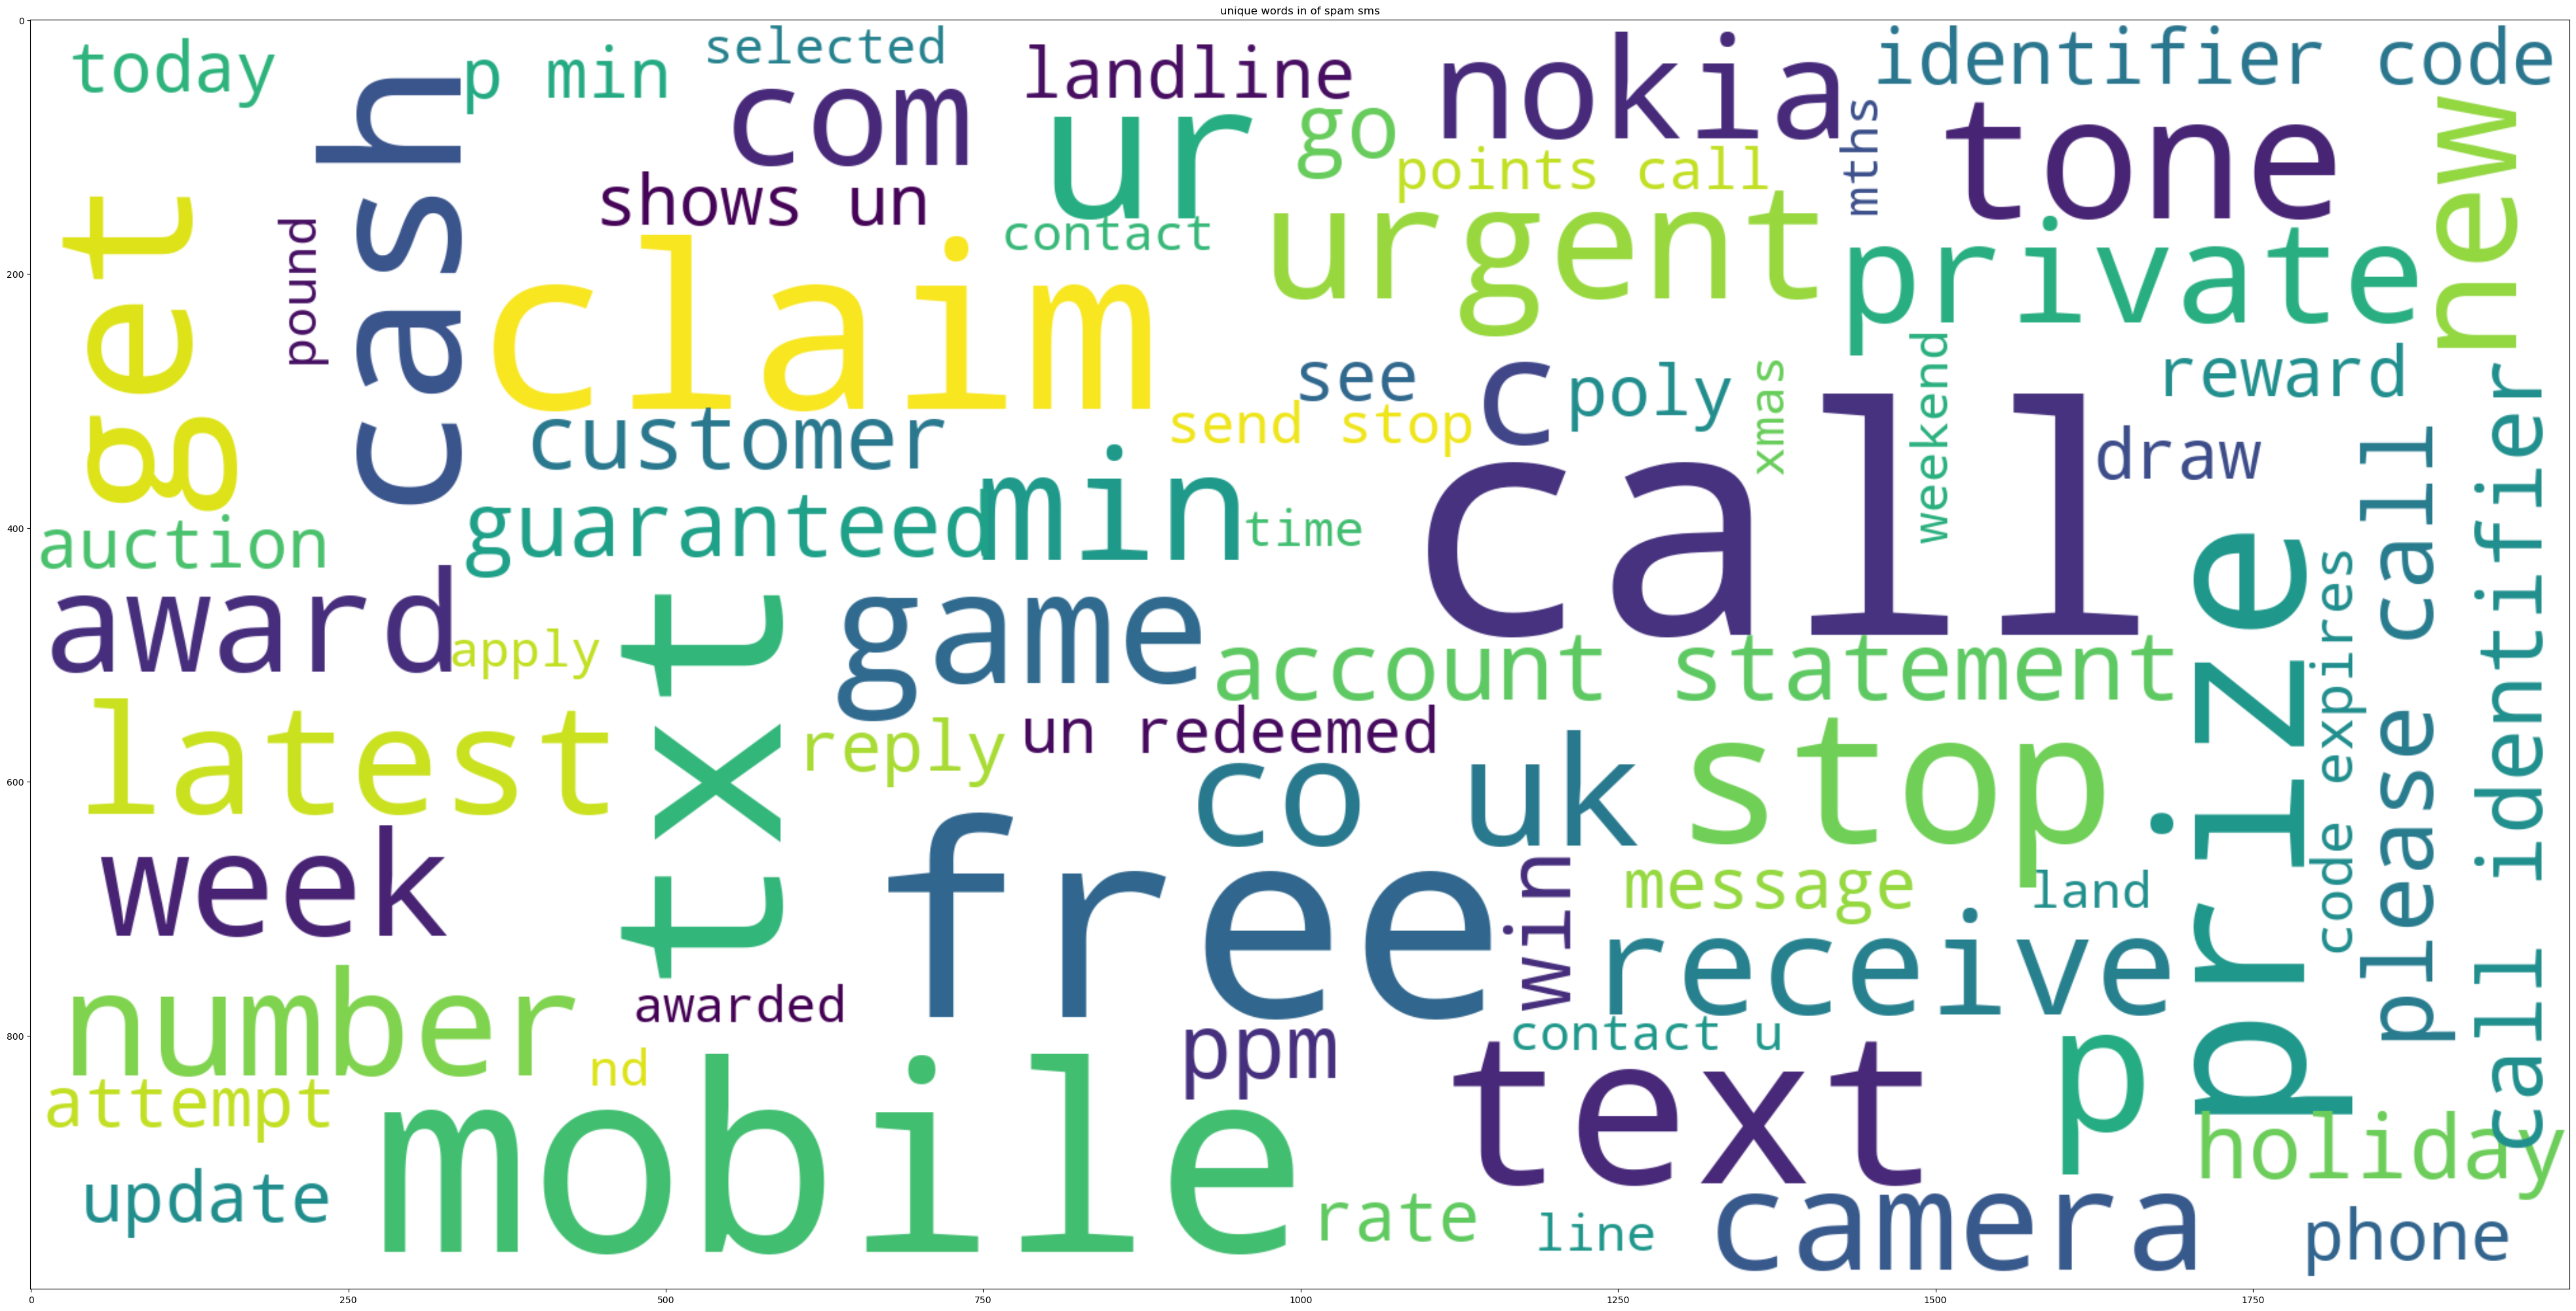

In [104]:

wordcloud = WordCloud(max_font_size=50, max_words = 70,stopwords = stop_words,scale=5,background_color = "white").generate(message_body_spam)


plt.figure(figsize=[50,30])

plt.imshow(wordcloud,interpolation="bilinear")
plt.title("unique words in of spam sms")
plt.show()

In [111]:
message_non_spam = " ".join([ i.lower() for i in df_train.Message_body[df_train.Label=="Non-Spam"]])

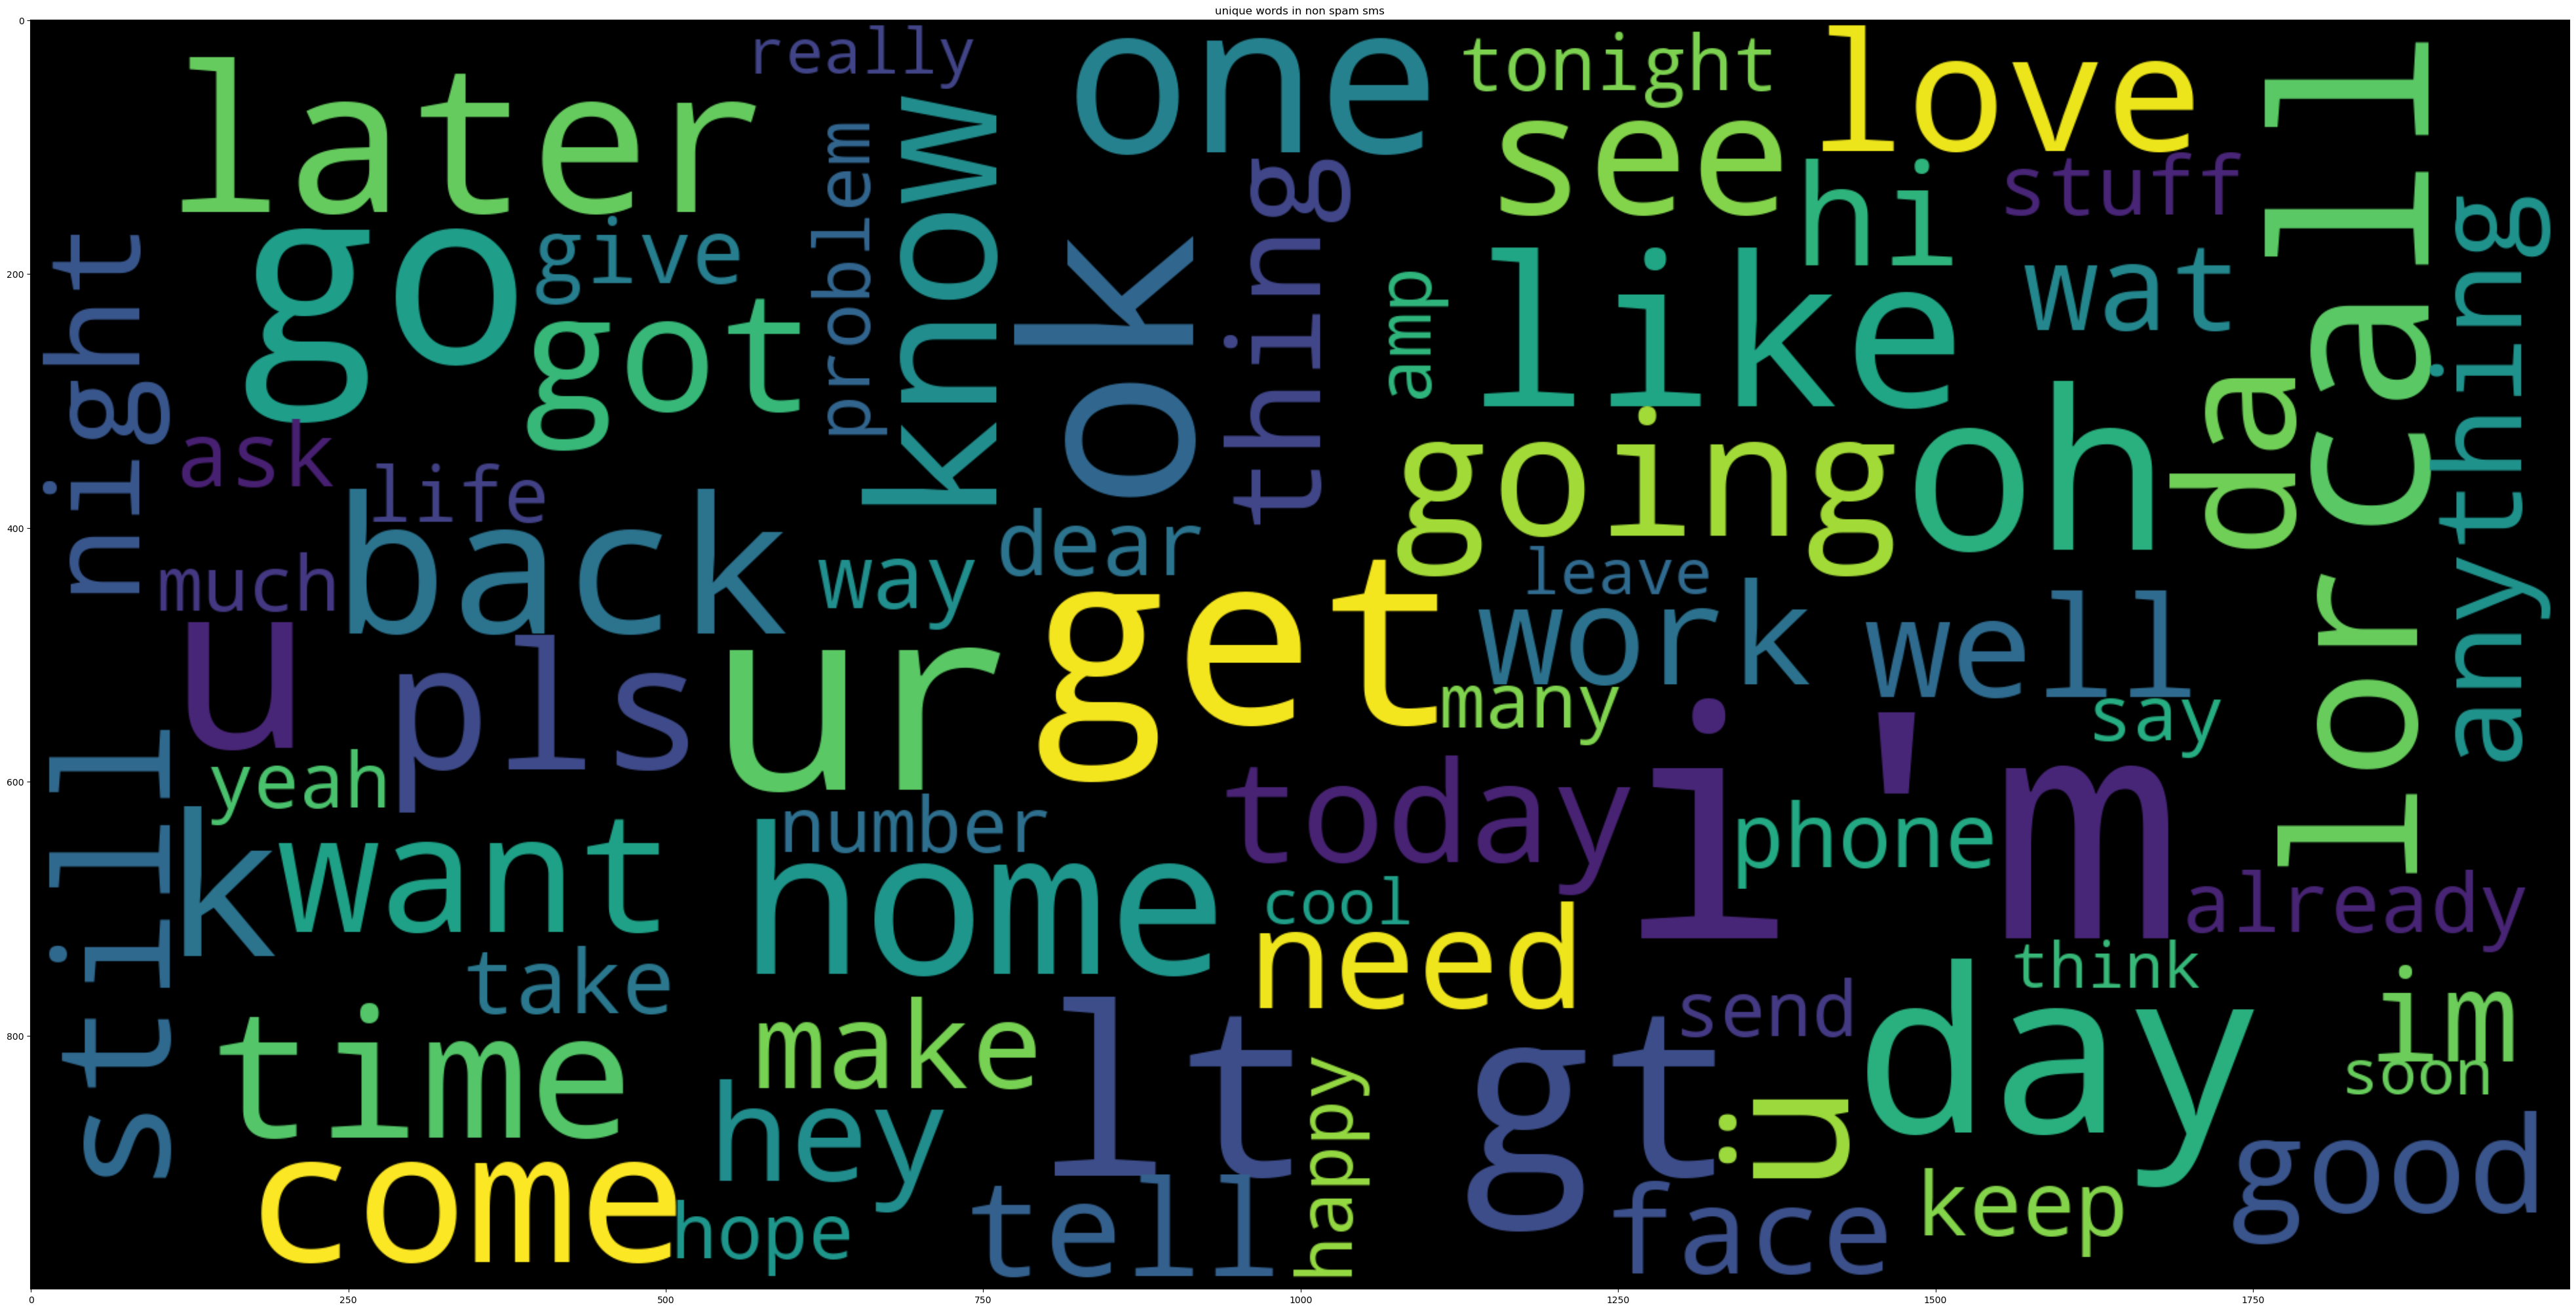

In [116]:
wordcloud = WordCloud(max_font_size=50,max_words= 70,scale=5,stopwords = stop_words,background_color = "black").generate(message_non_spam)

plt.figure(figsize=[50,30])

plt.imshow(wordcloud, interpolation = "bilinear")
plt.title("unique words in non spam sms")

plt.show()

In [124]:
x = df_train["lemma"]
y = df_train["Label"]

In [125]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=1)

# multinomial naive bayes

In [157]:
pipe_mnb = Pipeline(steps = [('tf', TfidfVectorizer() ),  ("mnnb",  MultinomialNB())] )


params = {'tf__max_features' : [1000, 2000, 3000],
 'tf__stop_words' : ['english', None],
 'tf__ngram_range' : [(1,1),(1,2)],
 'tf__use_idf' : [True, False],
 'mnnb__alpha' : [0.1, 0.5, 1]}

grid_mnb = GridSearchCV(pipe_mnb, param_grid = params,cv=5,n_jobs=-1,verbose=2)

grid_mnb.fit(xtrain,ytrain)

grid_mnb.best_params_

Fitting 5 folds for each of 72 candidates, totalling 360 fits


{'mnnb__alpha': 0.1,
 'tf__max_features': 2000,
 'tf__ngram_range': (1, 1),
 'tf__stop_words': None,
 'tf__use_idf': True}

In [158]:
print(grid_mnb.score(xtrain,ytrain))

0.9985052316890882


In [159]:
print(grid_mnb.score(xtest,ytest))

0.96875


In [160]:
validation_x = df_test["lemma"]
validation_y = df_test["Label"]

In [161]:
ypred = grid_mnb.predict(validation_x)

In [162]:
df_test["predicted"] = ypred

confusion_matrix(validation_y,ypred)

array([[47,  2],
       [19, 57]], dtype=int64)

# logistic regression

In [150]:
pipe_lgrg = Pipeline(steps = [('tf', TfidfVectorizer()), ('lgrg', LogisticRegression())])

# Create Parameter Grid
pgrid_lgrg = {
 'tf__max_features' : [1000, 2000, 3000],
 'tf__ngram_range' : [(1,1),(1,2)],
 'tf__use_idf' : [True, False],
 'lgrg__penalty' : ['l1', 'l2', 'elasticnet', 'none'],
 'lgrg__class_weight' : ['balanced', None],
 'lgrg__C' : [1.0, 0.9]
}

# Apply GridSearch to Pipeline to find the best parameters
gs_lgrg = GridSearchCV(pipe_lgrg, pgrid_lgrg, cv=5, n_jobs=-1, verbose=2)

# Fit the model
gs_lgrg.fit(xtrain, ytrain)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tf', TfidfVectorizer()),
                                       ('lgrg', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'lgrg__C': [1.0, 0.9],
                         'lgrg__class_weight': ['balanced', None],
                         'lgrg__penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'tf__max_features': [1000, 2000, 3000],
                         'tf__ngram_range': [(1, 1), (1, 2)],
                         'tf__use_idf': [True, False]},
             verbose=2)

In [152]:
gs_lgrg.best_params_

{'lgrg__C': 1.0,
 'lgrg__class_weight': None,
 'lgrg__penalty': 'none',
 'tf__max_features': 2000,
 'tf__ngram_range': (1, 2),
 'tf__use_idf': True}

In [154]:
print(gs_lgrg.score(xtrain,ytrain))
print(gs_lgrg.score(xtest,ytest))

1.0
0.96875


In [156]:
from sklearn.metrics import *

ypred = gs_lgrg.predict(validation_x)

df_test[ypred] = ypred

confusion_matrix(validation_y,ypred)

array([[49,  0],
       [12, 64]], dtype=int64)

# support vector classifier

In [ ]:
SVC()

In [163]:
pipe_svc = Pipeline(steps = [('tf', TfidfVectorizer()), ('svc', SVC())])

# Create Parameter Grid
pgrid_svc = {
 'tf__max_features' : [1000, 2000, 3000],
 'tf__ngram_range' : [(1,1),(1,2)],
 'tf__use_idf' : [True, False],
 'svc__kernel' : ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
 'svc__decision_function_shape' : ['ovo', 'ovr'],
 'svc__C' : [1.0, 0.9, 0.8, 0.7]
}

# Apply GridSearch to Pipeline to find the best parameters
gs_svc = GridSearchCV(pipe_svc, pgrid_svc, cv=5, n_jobs=-1, verbose=2)

# Fit the model
gs_svc.fit(xtrain, ytrain)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tf', TfidfVectorizer()),
                                       ('svc', SVC())]),
             n_jobs=-1,
             param_grid={'svc__C': [1.0, 0.9, 0.8, 0.7],
                         'svc__decision_function_shape': ['ovo', 'ovr'],
                         'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid',
                                         'precomputed'],
                         'tf__max_features': [1000, 2000, 3000],
                         'tf__ngram_range': [(1, 1), (1, 2)],
                         'tf__use_idf': [True, False]},
             verbose=2)

In [164]:
gs_svc.best_params_

{'svc__C': 1.0,
 'svc__decision_function_shape': 'ovo',
 'svc__kernel': 'sigmoid',
 'tf__max_features': 2000,
 'tf__ngram_range': (1, 1),
 'tf__use_idf': True}

In [165]:
print(gs_svc.score(xtrain,ytrain))
print(gs_svc.score(xtest,ytest))

0.9880418535127056
0.96875


In [166]:
ypred = gs_svc.predict(validation_x)

df_test["ypred_svc"] = ypred

In [167]:
confusion_matrix(validation_y,ypred)

array([[49,  0],
       [17, 59]], dtype=int64)

# ensemble technique

**Random Forest Classifier**

In [179]:
pipe_rfc = Pipeline(steps = [('tf', TfidfVectorizer()), ('rfc', RandomForestClassifier())])

# Create Parameter Grid
pgrid_rfc = {
 'tf__max_features' : [1000, 2000, 3000],
 'tf__ngram_range' : [(1,1),(1,2)],
 'tf__use_idf' : [True, False]
}

# Apply GridSearch to Pipeline to find the best parameters
gs_rfc = GridSearchCV(pipe_rfc, pgrid_rfc, cv=5, n_jobs=-1, verbose=2)

# Fit the model
gs_rfc.fit(xtrain, ytrain)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tf', TfidfVectorizer()),
                                       ('rfc', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'tf__max_features': [1000, 2000, 3000],
                         'tf__ngram_range': [(1, 1), (1, 2)],
                         'tf__use_idf': [True, False]},
             verbose=2)

In [180]:
gs_rfc.best_params_

{'tf__max_features': 1000, 'tf__ngram_range': (1, 1), 'tf__use_idf': True}

In [182]:
print(gs_rfc.score(xtrain,ytrain))
print(gs_rfc.score(xtest,ytest))

1.0
0.9548611111111112


In [186]:
ypred_rfc = gs_rfc.predict(validation_x)

df_test["ypred_rfc"] = ypred_rfc

confusion_matrix(validation_y,ypred_rfc)

array([[49,  0],
       [29, 47]], dtype=int64)

**Adaboostclassifier**

In [187]:
pipe_abc = Pipeline(steps = [('tf', TfidfVectorizer()), ('rfc', AdaBoostClassifier())])

# Create Parameter Grid
pgrid_abc = {
 'tf__max_features' : [1000, 2000, 3000],
 'tf__ngram_range' : [(1,1),(1,2)],
 'tf__use_idf' : [True, False]
}

# Apply GridSearch to Pipeline to find the best parameters
gs_abc = GridSearchCV(pipe_abc, pgrid_rfc, cv=5, n_jobs=-1, verbose=2)

# Fit the model
gs_abc.fit(xtrain, ytrain)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tf', TfidfVectorizer()),
                                       ('rfc', AdaBoostClassifier())]),
             n_jobs=-1,
             param_grid={'tf__max_features': [1000, 2000, 3000],
                         'tf__ngram_range': [(1, 1), (1, 2)],
                         'tf__use_idf': [True, False]},
             verbose=2)

In [188]:
print(gs_abc.score(xtrain,ytrain))
print(gs_abc.score(xtest,ytest))

0.9985052316890882
0.9618055555555556


In [191]:
ypred_abc = gs_abc.predict(validation_x)

df_test["ypred_abc"] = ypred_abc

confusion_matrix(validation_y,ypred_abc)

array([[49,  0],
       [19, 57]], dtype=int64)

**comparing all the built models**

In [192]:
#according to the training phase


models = []

models.append(gs_rfc)
models.append(gs_abc)
models.append(gs_svc)
models.append(gs_lgrg)
models.append(grid_mnb)

In [193]:
models

[GridSearchCV(cv=5,
              estimator=Pipeline(steps=[('tf', TfidfVectorizer()),
                                        ('rfc', RandomForestClassifier())]),
              n_jobs=-1,
              param_grid={'tf__max_features': [1000, 2000, 3000],
                          'tf__ngram_range': [(1, 1), (1, 2)],
                          'tf__use_idf': [True, False]},
              verbose=2),
 GridSearchCV(cv=5,
              estimator=Pipeline(steps=[('tf', TfidfVectorizer()),
                                        ('rfc', AdaBoostClassifier())]),
              n_jobs=-1,
              param_grid={'tf__max_features': [1000, 2000, 3000],
                          'tf__ngram_range': [(1, 1), (1, 2)],
                          'tf__use_idf': [True, False]},
              verbose=2),
 GridSearchCV(cv=5,
              estimator=Pipeline(steps=[('tf', TfidfVectorizer()),
                                        ('svc', SVC())]),
              n_jobs=-1,
              param_grid={'svc__

In [196]:
scores = [(i.score(xtest,ytest),models) for i in models] 

In [199]:
scores = sorted(scores, key=lambda x: x[0],reverse=True)

**comparing the result of three models**

In [219]:
s=[]
for i in scores:
    s.append(i[0])

In [220]:
s

[0.96875, 0.96875, 0.96875, 0.9618055555555556, 0.9548611111111112]

In [223]:
m = ["rfc","abc","svc","lgrg","mnb"]

res = dict(zip(m,s))
res

{'rfc': 0.96875,
 'abc': 0.96875,
 'svc': 0.96875,
 'lgrg': 0.9618055555555556,
 'mnb': 0.9548611111111112}

* according the training phase score random forest gives good accuracy
* here random forest works as a good model.